The Data Set is taken from: https://engineering.case.edu/bearingdatacenter/download-data-file

-the dataset is from matlab -We only take the 12k sampling rate of drive end dataset at 1 hp for this project 
-drive end referring to the drive end part of the motor as that is where the accelerometer is placed

PRE-PROCESSING DATA PART

In [2]:
import scipy.io  #to use the matlab file
import numpy as np  #to use scientific computing, to create multi dimensional array
import seaborn as sns #use to create visualisation in python
import pandas as pd  #use to create a dataframe
import os  #library that allow to interact with os
import matplotlib.pyplot as plt #to create graph and other visualisation chart and graph

In [3]:
for root,dirs,files in os.walk(r"C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load",topdown=False):
    for file_name in files:
        path=os.path.join(root,file_name)
        print(path)

C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B007_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B014_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B021_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR007_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR014_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR021_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\OR007_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\OR014_1.mat
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Loa

In [8]:
path=r"C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\OR021_1.mat"
mat=scipy.io.loadmat(path)

In [10]:
mat.items() #breakdown dict into its keys and values

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 14:36:57 2000'), ('__version__', '1.0'), ('__globals__', []), ('X235_DE_time', array([[-0.02598962],
       [-0.02720788],
       [-0.04791836],
       ...,
       [-0.04588792],
       [-0.07837495],
       [-0.19410998]])), ('X235_FE_time', array([[0.00349273],
       [0.04725455],
       [0.02835273],
       ...,
       [0.03513273],
       [0.00390364],
       [0.02876364]])), ('X235_BA_time', array([[ 0.0295415 ],
       [ 0.00507116],
       [ 0.04620388],
       ...,
       [-0.00378324],
       [-0.03195634],
       [-0.08371434]])), ('X235RPM', array([[1771]], dtype=uint16))])

In [9]:
list(mat.keys()) #now we want to know the DE is at which number of keys (4th element)


['__header__',
 '__version__',
 '__globals__',
 'X235_DE_time',
 'X235_FE_time',
 'X235_BA_time',
 'X235RPM']

In [11]:
key_name=list(mat.keys())[3] #assign the 4th element (DE keys) into key_name variable
                             #and convert it into a list

The line key_name=list(mat.key())[3] extracts the name of the fourth variable stored in the dictionary mat.

Here's how the code works:

mat is a dictionary that contains data loaded from a MATLAB file using the loadmat function provided by the scipy.io module. The keys in the dictionary represent the names of the variables in the MATLAB workspace, and the corresponding values represent the values of those variables.

mat.keys() returns a list of all the keys (variable names) present in the mat dictionary.

list(mat.keys()) converts the keys returned by mat.keys() into a list, so that we can access the keys using an index.

list(mat.keys())[3] accesses the fourth element (index 3) in the list of keys, which represents the name of the fourth variable in the MATLAB workspace.

Finally, this name is assigned to the variable key_name, which can be used to access the corresponding data from the mat dictionary.

Overall, the line of code is used to extract the name of a specific variable from a dictionary containing data loaded from a MATLAB file, so that we can access the data associated with that variable within our Python program.

In [12]:
DE_data=mat.get(key_name) #this is to get all value in DE keys (dict concept) and assigned it in new var

In [14]:
fault=np.full((len(DE_data),1),file_name[:-4]) #to create a label

In [15]:
df_temp=pd.DataFrame({"DE_data":np.ravel(DE_data),"fault":np.ravel(fault)})

In [16]:
df_temp

,DE_data,fault
0,-0.025990,OR021_1
1,-0.027208,OR021_1
2,-0.047918,OR021_1
3,0.037766,OR021_1
4,-0.043857,OR021_1
...,...,...
121986,-0.180709,OR021_1
121987,-0.167308,OR021_1
121988,-0.045888,OR021_1
121989,-0.078375,OR021_1


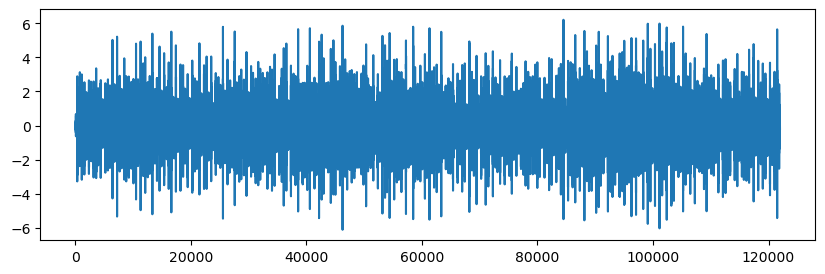

In [17]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0]) #iloc = integer location ([:row,:column])
plt.show()

In [19]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk(r"C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('all_faults12k.csv',index=False) 

C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B007_1.mat
['B007_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B014_1.mat
['B007_1' 'B014_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\B021_1.mat
['B007_1' 'B014_1' 'B021_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR007_1.mat
['B007_1' 'B014_1' 'B021_1' 'IR007_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR014_1.mat
['B007_1' 'B014_1' 'B021_1' 'IR007_1' 'IR014_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\IR021_1.mat
['B007_1' 'B014_1' 'B021_1' 'IR007_1' 'IR014_1' 'IR021_1']
C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\Dataset\12k SR DE 1Load\OR007_1.mat
['B00

Explaination of above code:

This code processes a directory of MATLAB data files containing vibration data from rotating machinery and creates a single CSV file containing all of the data.

The first line creates an empty Pandas DataFrame with two columns: "DE_data" and "fault". This DataFrame will be populated with data from the MATLAB files.

The os.walk() method is used to recursively traverse the directory and find all the files with the extension .mat. For each file, the path is joined with the filename to create the full path to the file.

The scipy.io.loadmat() method is used to load the MATLAB file into memory as a dictionary object. The list(mat.keys())[3] retrieves the fourth key (index 3) of the dictionary, which is the key for the vibration data. This key is used to extract the vibration data from the dictionary using the mat.get() method. The fault label for the data is obtained from the filename using the file_name[:-4] expression, which removes the last four characters (the .mat extension) from the filename.

The np.full() method is used to create an array of fault labels with the same length as the DE_data array. The np.ravel() method is used to flatten both the DE_data and fault arrays into 1D arrays.

A temporary DataFrame is created from the flattened DE_data and fault arrays using the pd.DataFrame() method, and the pd.concat() method is used to concatenate the temporary DataFrame with the main DataFrame df. The resulting concatenated DataFrame is stored in the df variable.

The df['fault'].unique() expression is used to print out the unique fault labels in the DataFrame after each file is processed.

Finally, the df.to_csv() method is used to save the complete DataFrame to a CSV file named all_faults.csv without row indexes.

In [20]:
df=pd.read_csv(r"C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\12K SR 1HP LOAD CNN BEARING FAULT CLASSIFICATION\all_faults12k.csv")

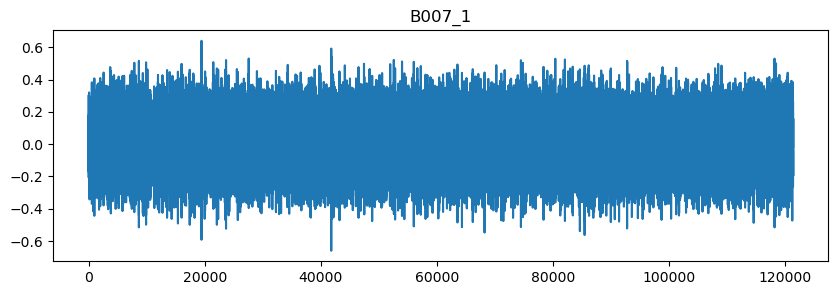

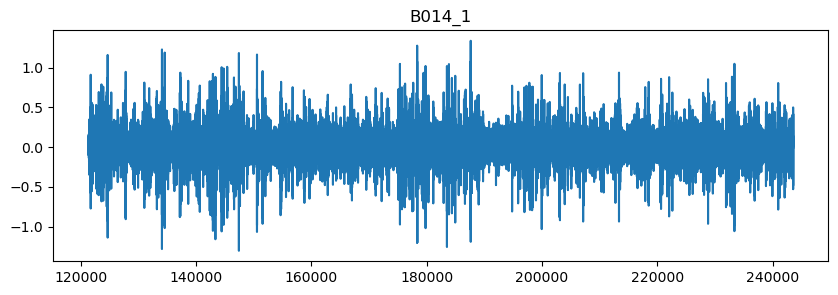

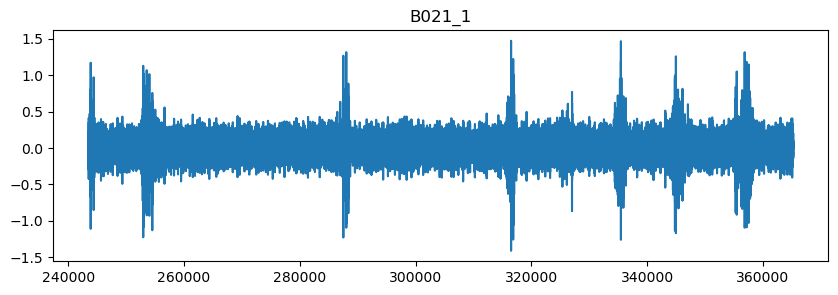

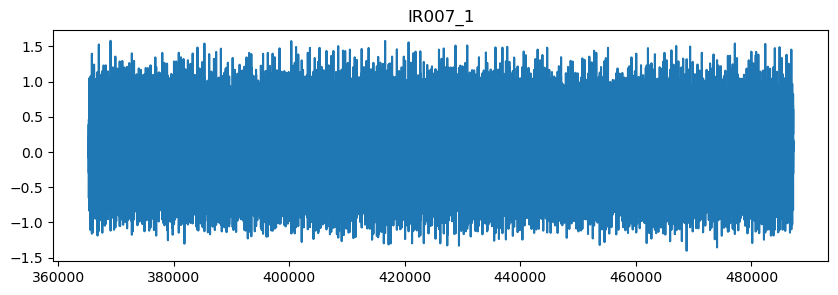

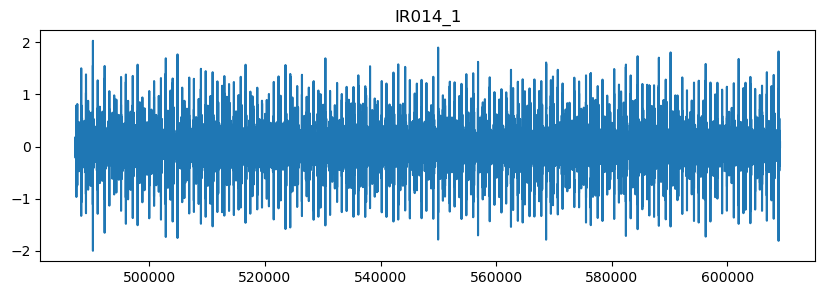

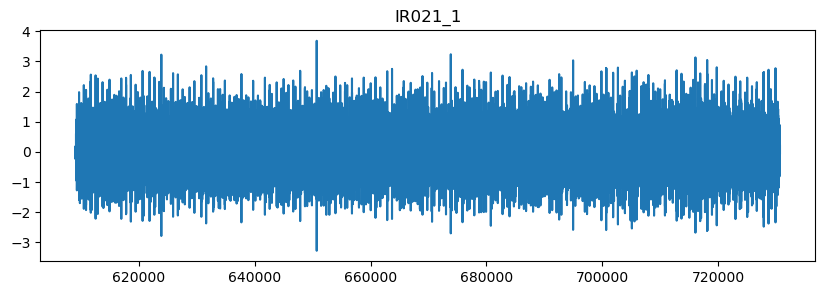

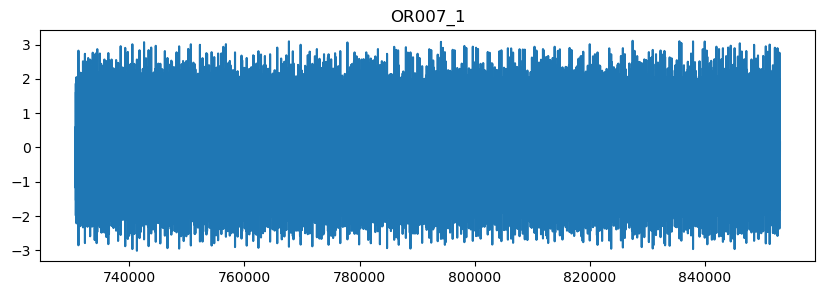

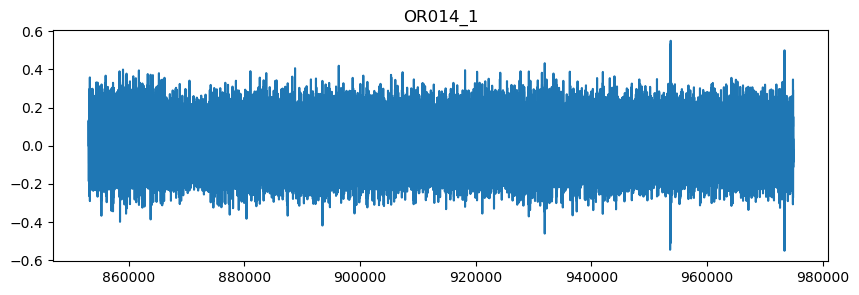

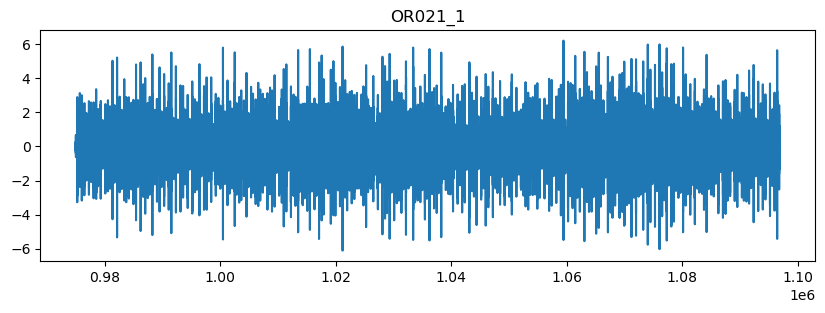

In [21]:
#to create an amplitude vs time graph
faults=df["fault"].unique()
for f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df["fault"]==f].iloc[:,0])
    plt.title(f)
    plt.show()

<Axes: ylabel='DE_data'>

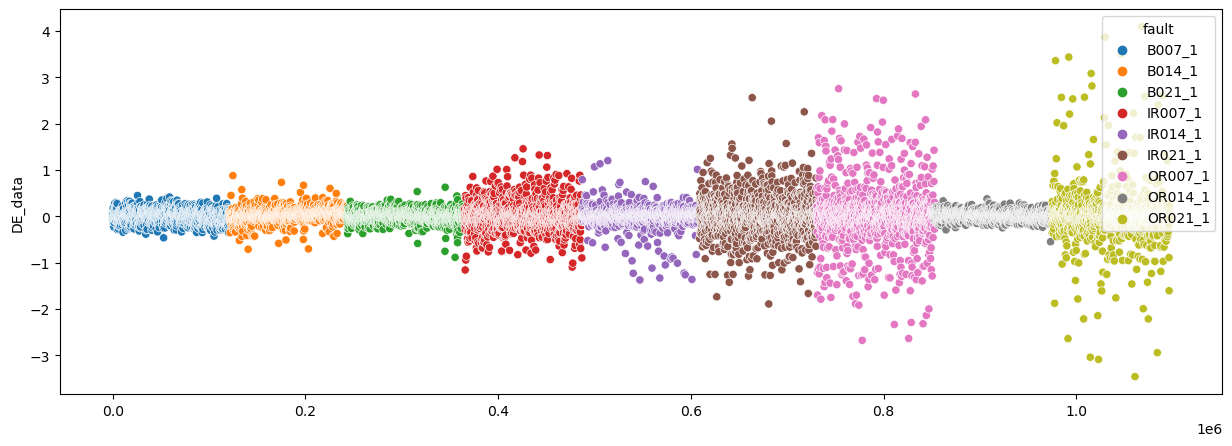

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y="DE_data",x=np.arange(0,len(df),100),hue="fault")

CONVERTING TIME DOMAIN TO FREQUENCY DOMAIN USING FFT

In [45]:
import scipy.io  #to import file from matlab
import seaborn as sns  #use as data visualisation tools for high level interface
import numpy as np  #used for multidimensional array
import pandas as pd  #use to create a data frame for a set of data
import os  #used to interact with os of the system
import matplotlib.pyplot as plt  #use to plot a graph and charts in python
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from scipy.signal import find_peaks


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(df):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT.
    """
    N = len(df)
    
    if N == 1:
        return df
    else:
        # Zero-pad the input signal to the nearest power of 2
        next_power_of_2 = int(np.ceil(np.log2(N)))
        df = np.pad(df, (0, 2**next_power_of_2 - N), 'constant', constant_values=(0,))
        
        # Compute the FFT of the zero-padded input signal
        X_even = FFT(df[::2])
        X_odd = FFT(df[1::2])
        factor = np.exp(-2j*np.pi*np.arange(2**next_power_of_2)/ (2**next_power_of_2))
        
        X = np.concatenate(\
            [X_even+factor[:int(2**next_power_of_2/2)]*X_odd,
             X_even+factor[int(2**next_power_of_2/2):]*X_odd])
        return X

#input signal
sr = 12000  #Sample rate
ts = 1.0/sr  #time interval between to consequtive seconds
t = np.arange(0,1,ts)


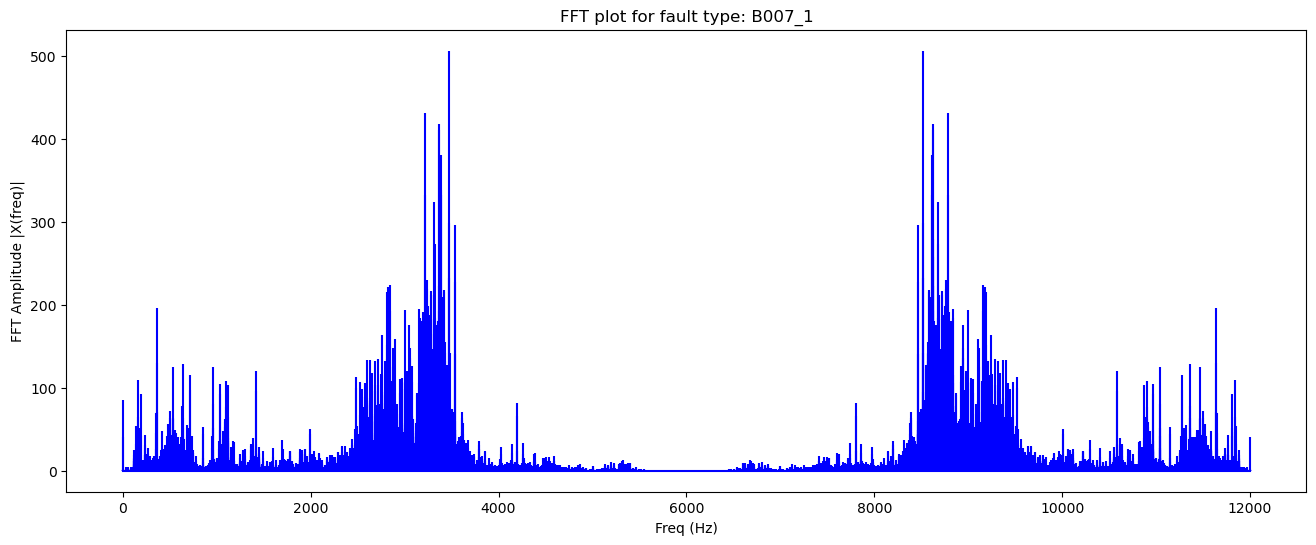

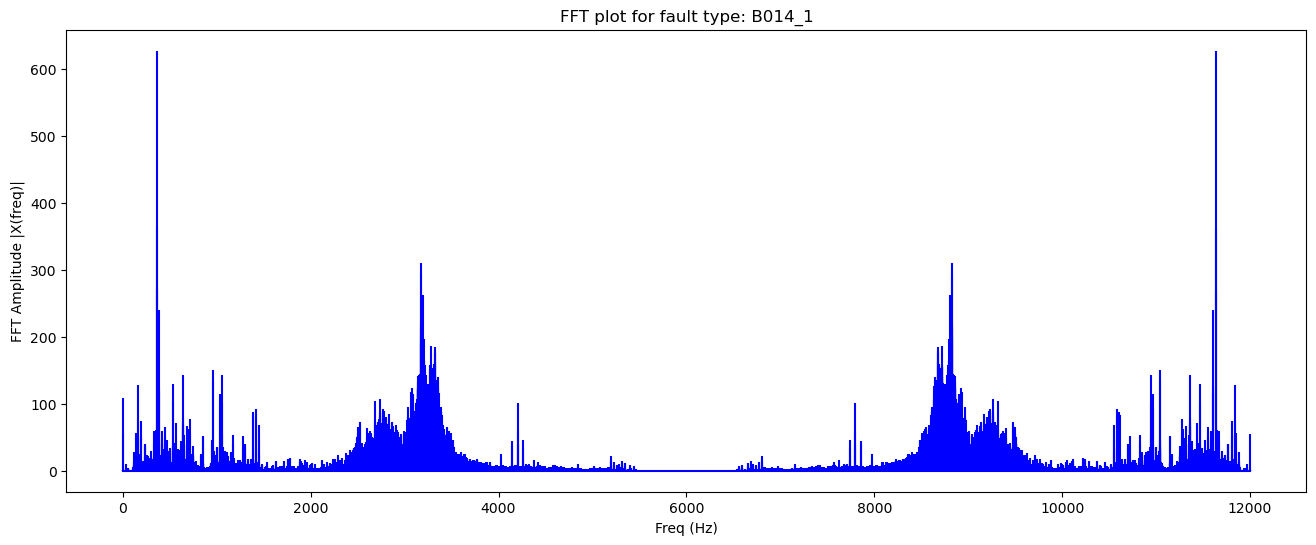

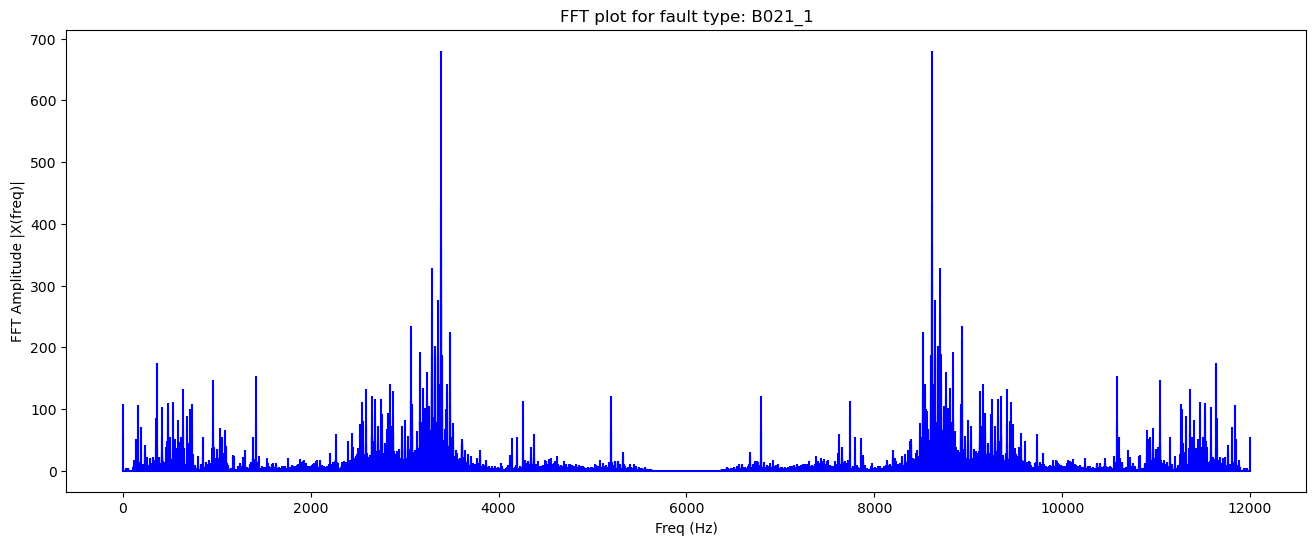

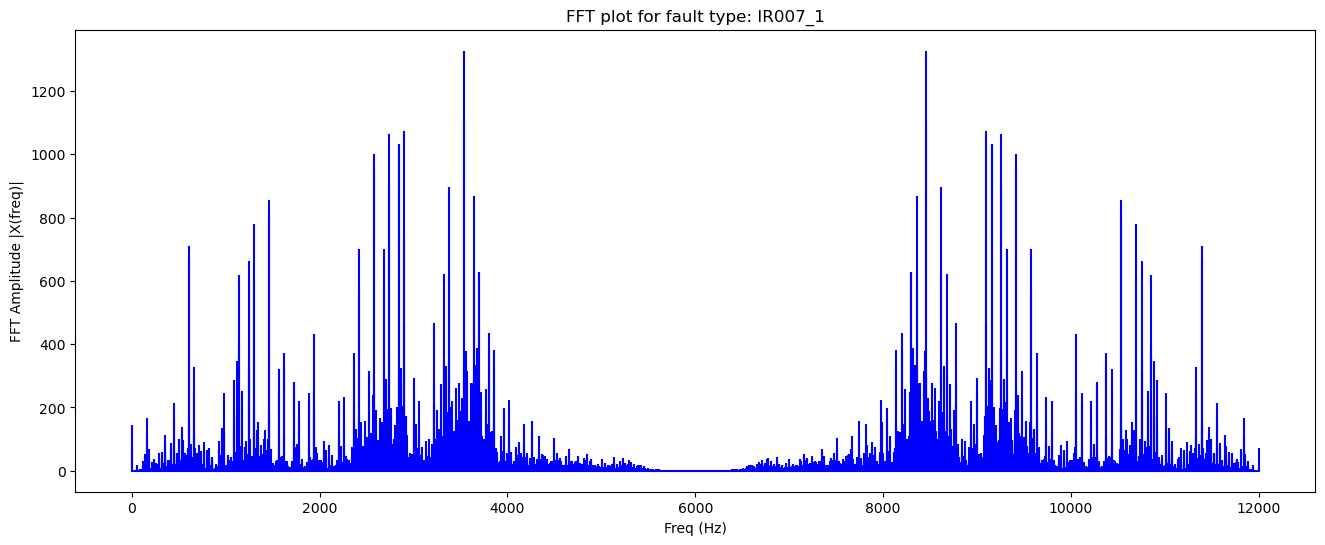

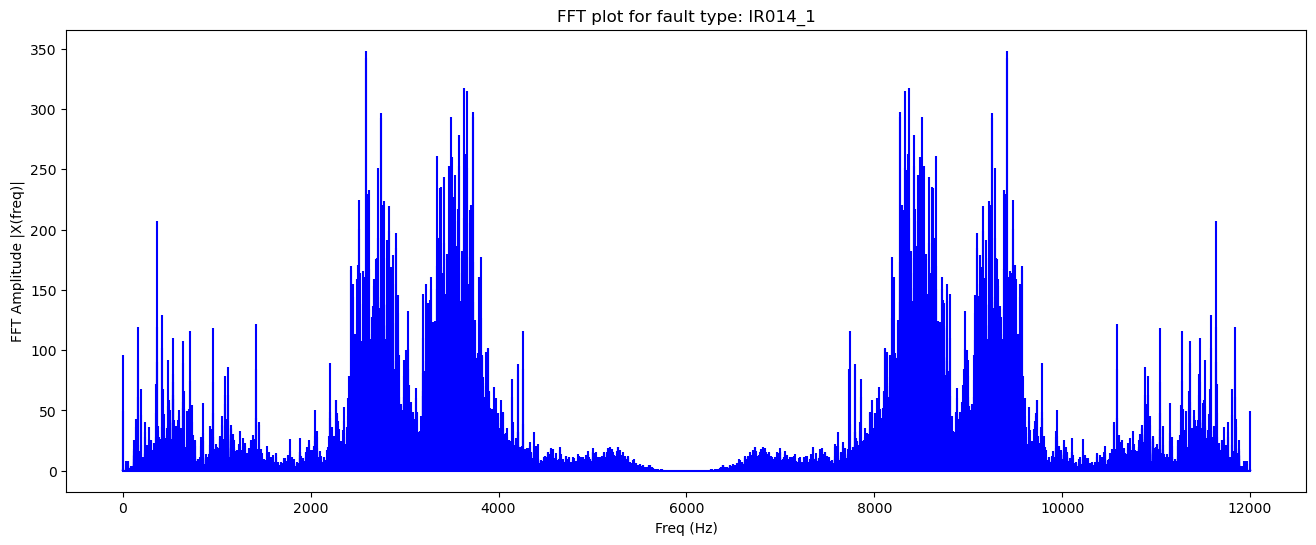

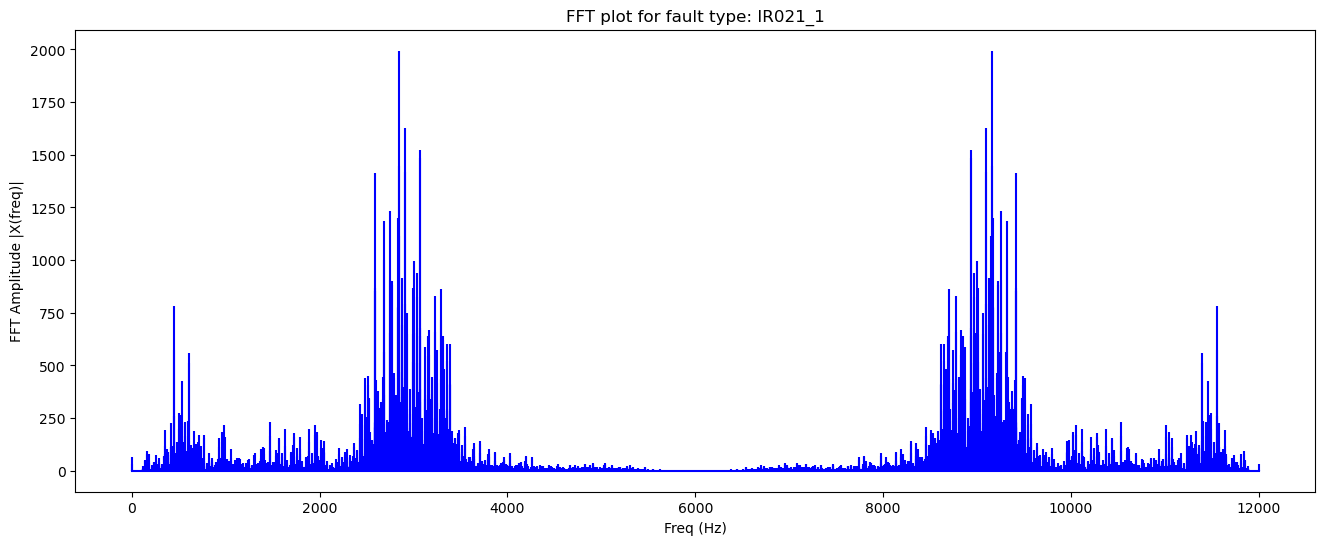

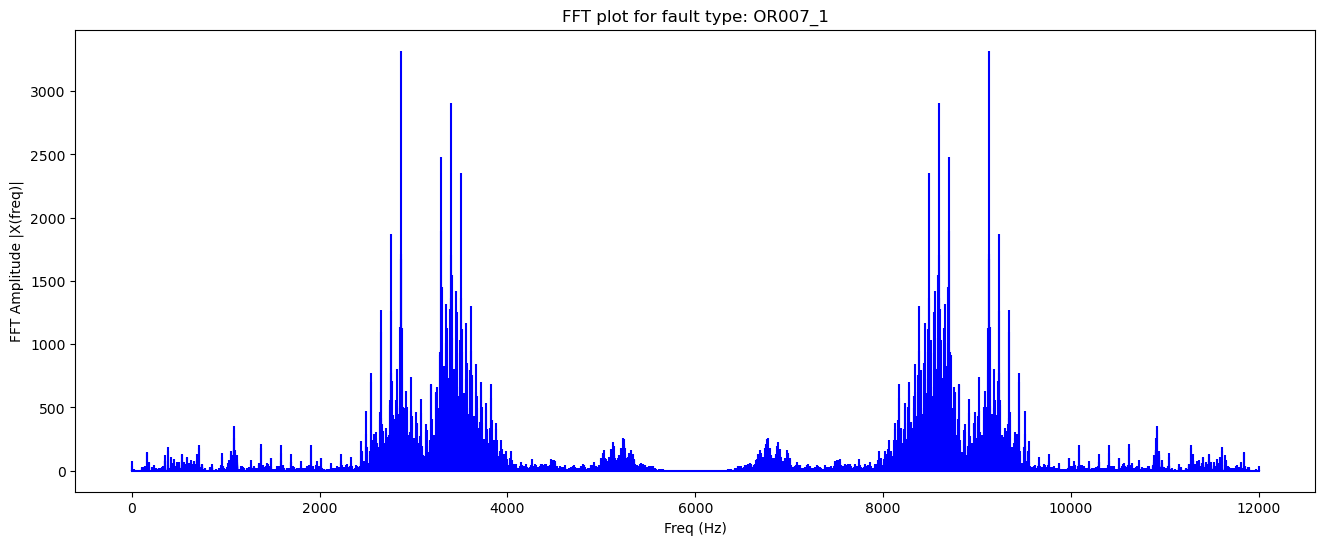

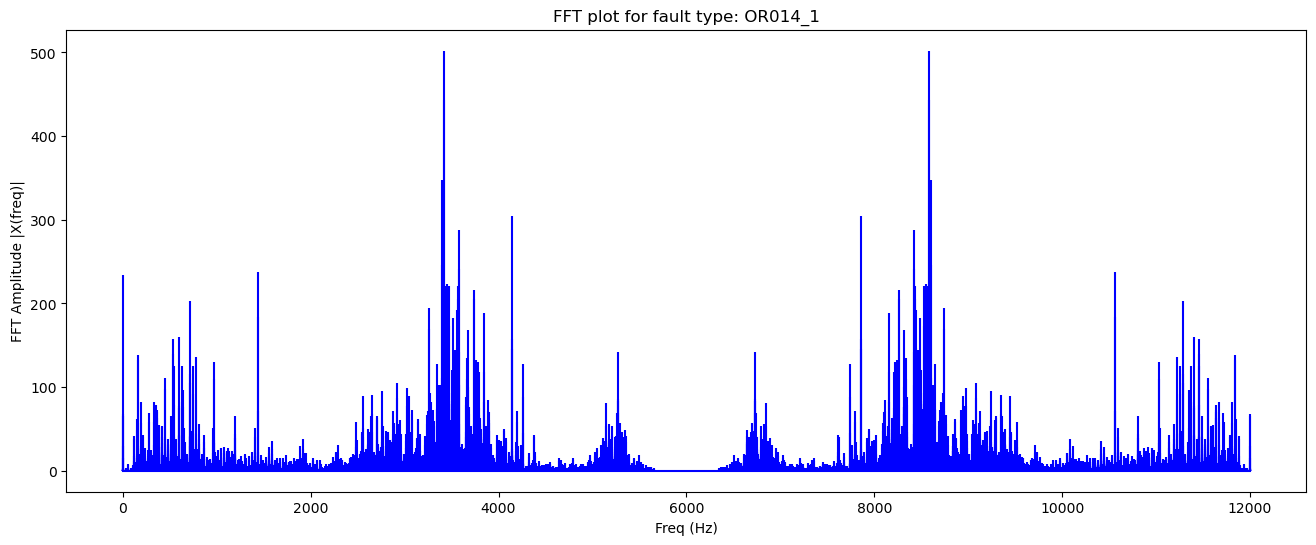

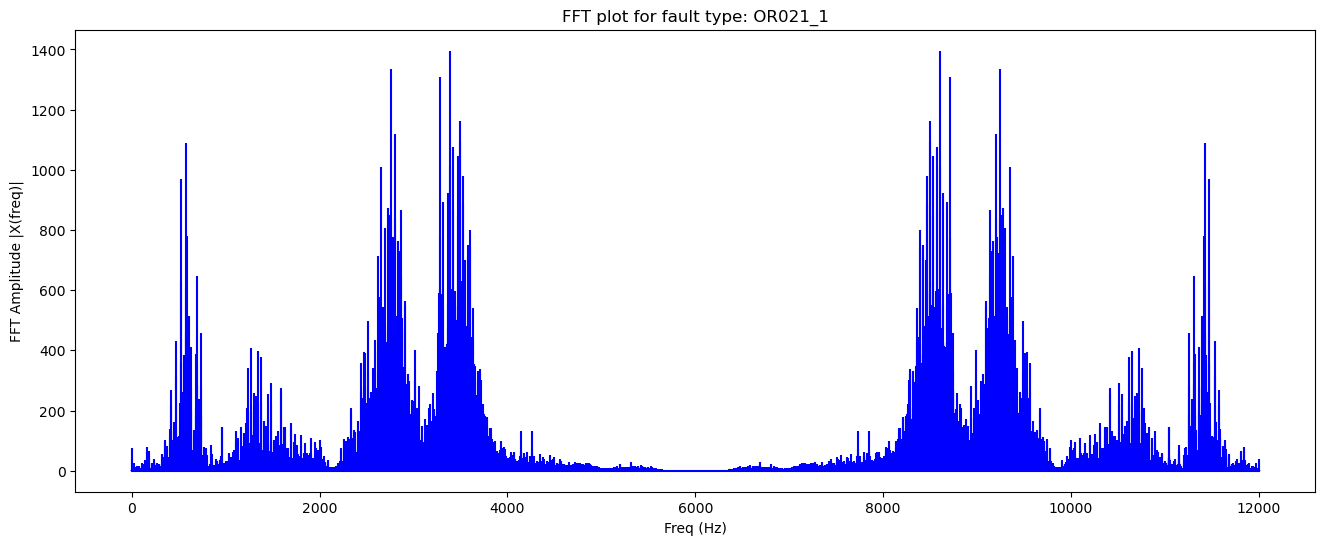

In [66]:
# read the data from csv
# read the data from csv
df = pd.read_csv(r"C:\Users\gomug\Python Project\Deep Learning for Bearing Condition Monitoring\12K SR 1HP LOAD CNN BEARING FAULT CLASSIFICATION\all_faults12k.csv")

# group the data by "fault" column
groups = df.groupby("fault") 

# iterate over each group
for fault, group_df in groups:
    # extract the "DE_data" column
    signal = group_df["DE_data"].values 
    
    # apply Hanning window to the signal
  
    window_size = 48000  #no of samples
    window = np.hanning(window_size)
    windowed_signal = window * signal[:window_size]

    # compute FFT
    X = np.fft.fft(windowed_signal)

    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    plt.figure(figsize = (16, 6))
    plt.stem(freq, abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.title(f"FFT plot for fault type: {fault}")
    plt.show()

    #This block of code creates a plot of the FFT using the stem function from the matplotlib library. The x-axis of the plot 
    #represents the frequency values calculated earlier, while the y-axis represents the magnitude of the FFT (abs(X)). 
    #The plot is displayed using the show function from matplotlib. The plot's title includes the fault value for the current group. 
    #The figure function sets the size of the plot to 12 inches wide by 6 inches tall.



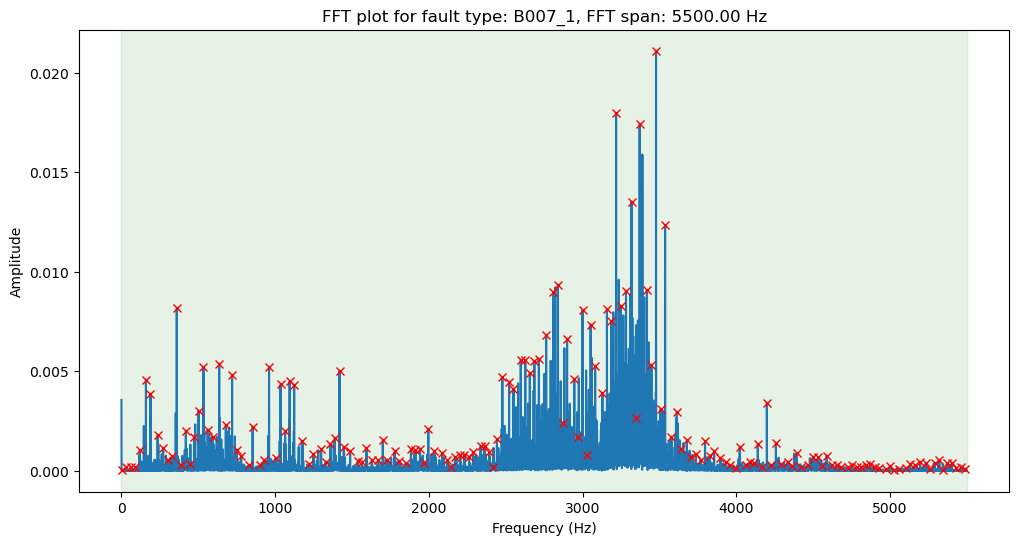

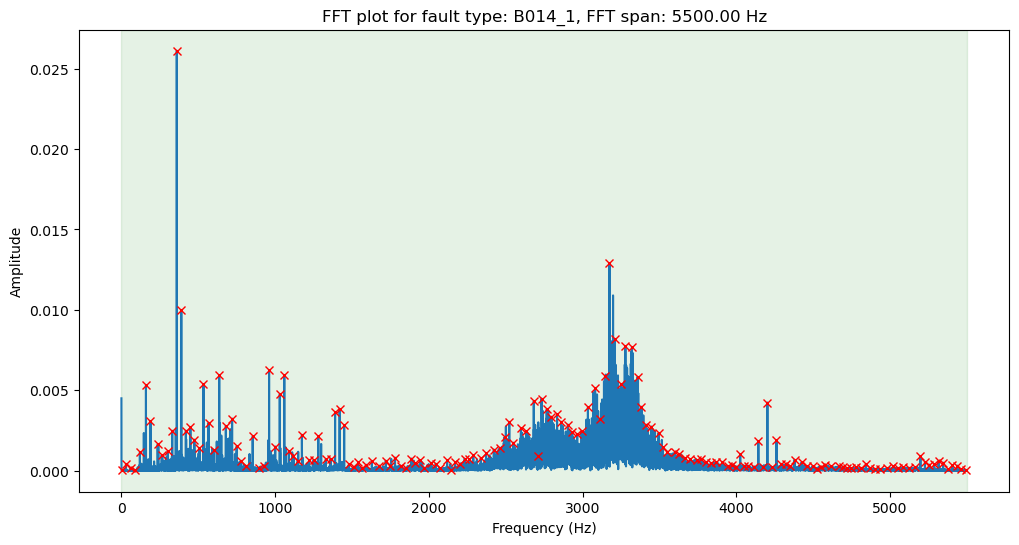

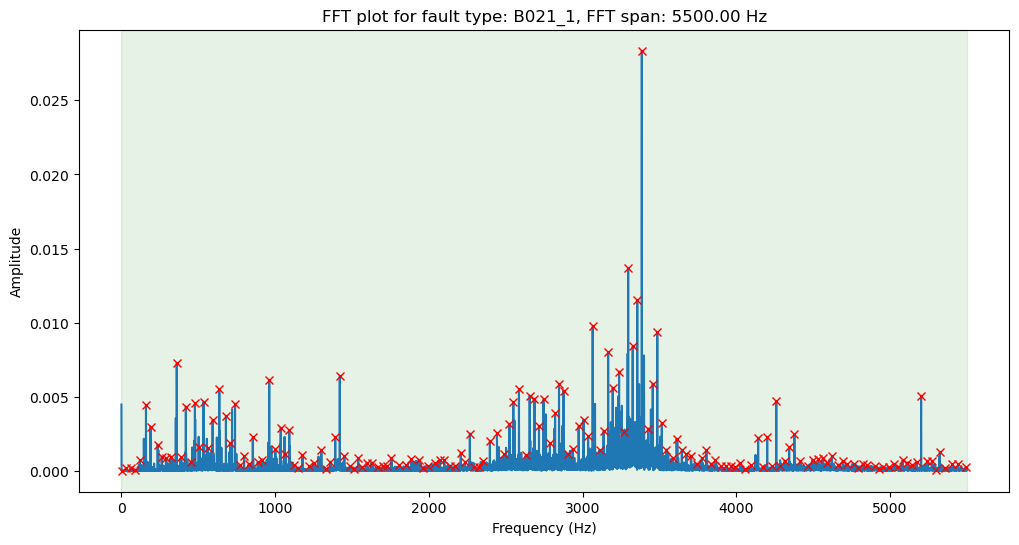

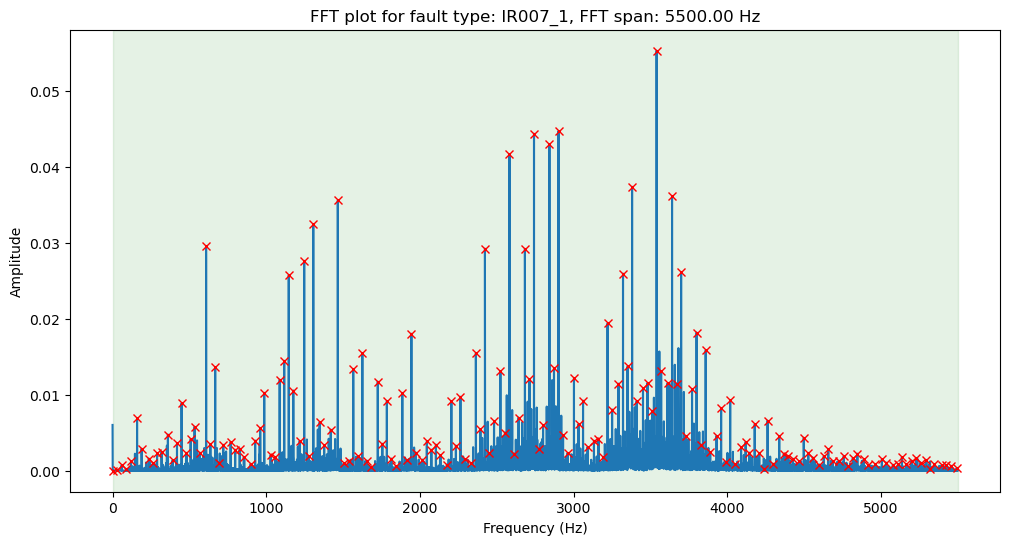

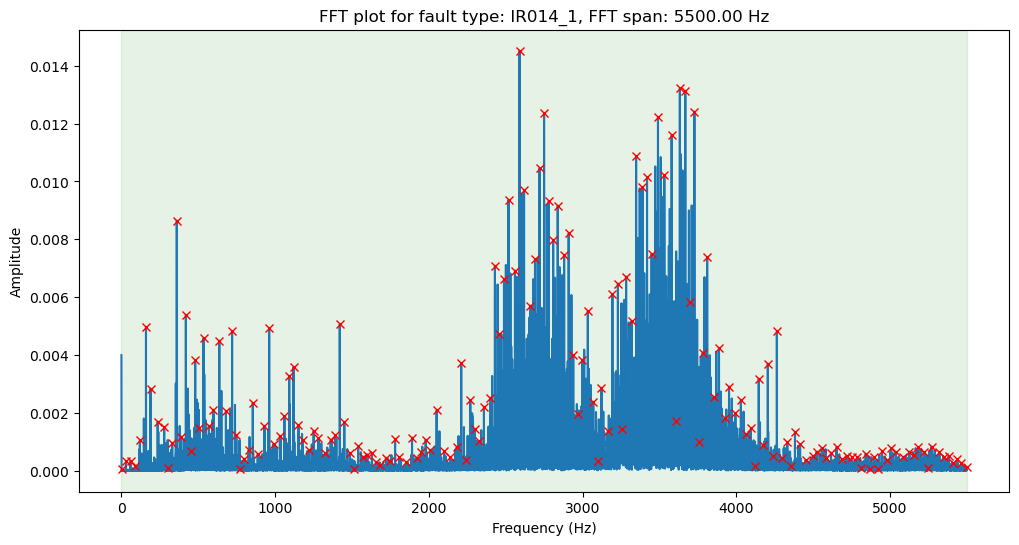

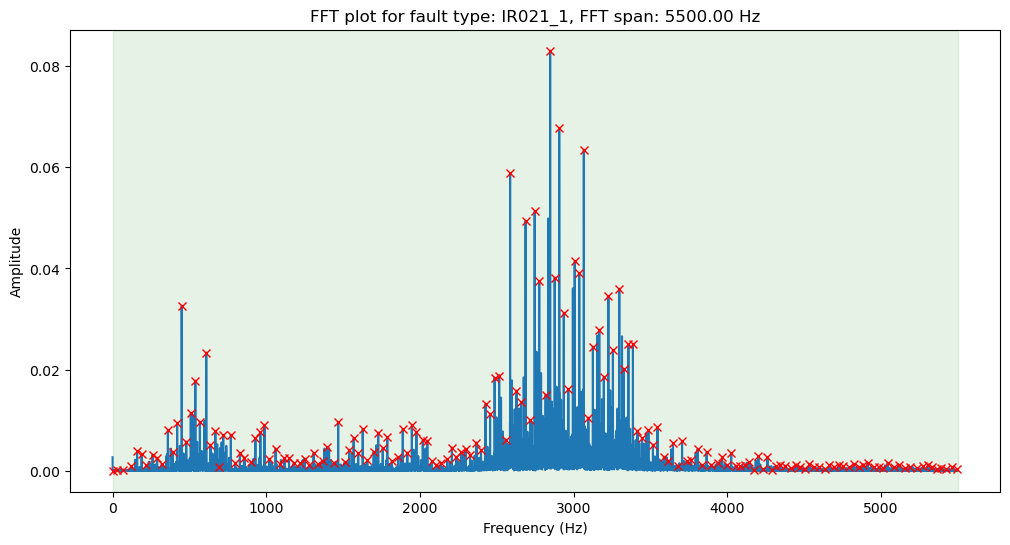

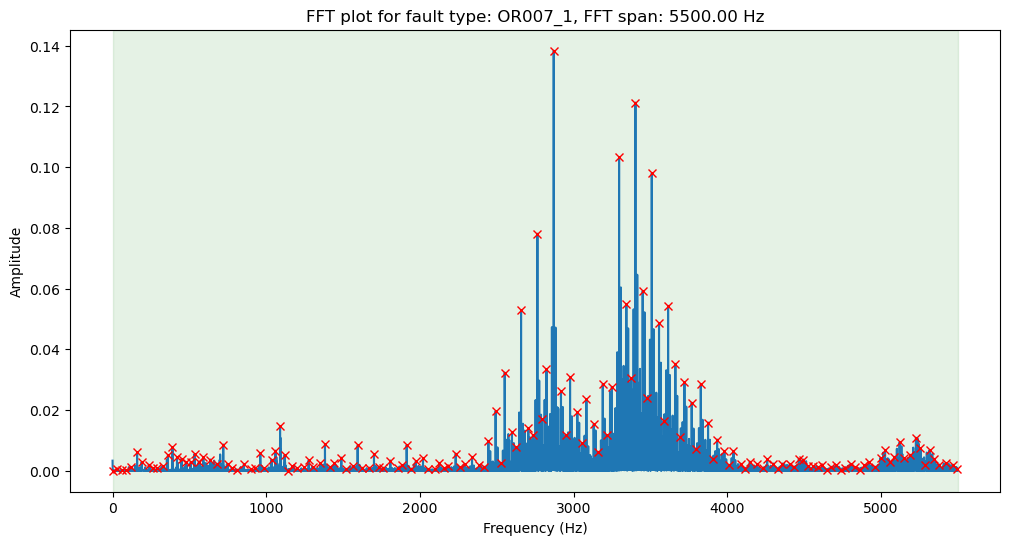

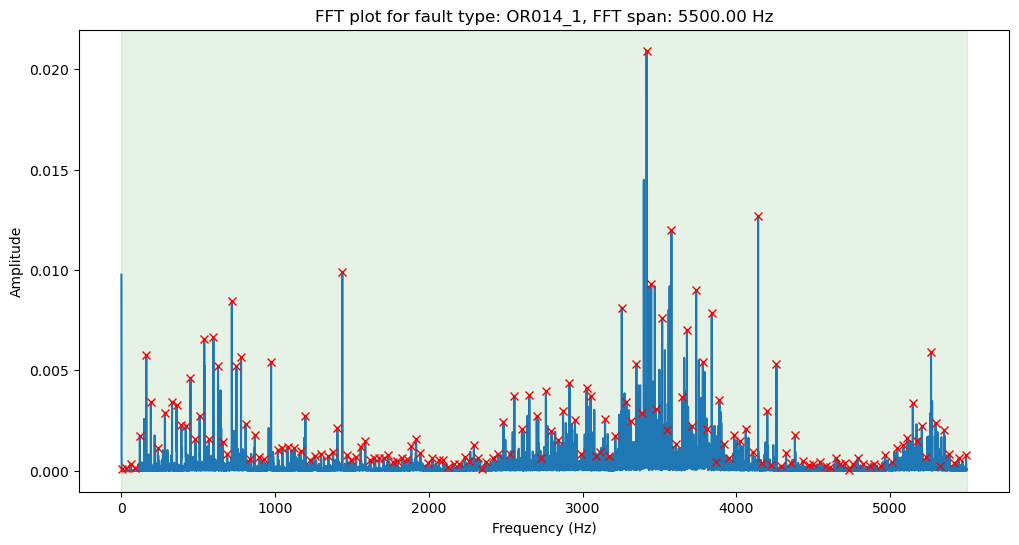

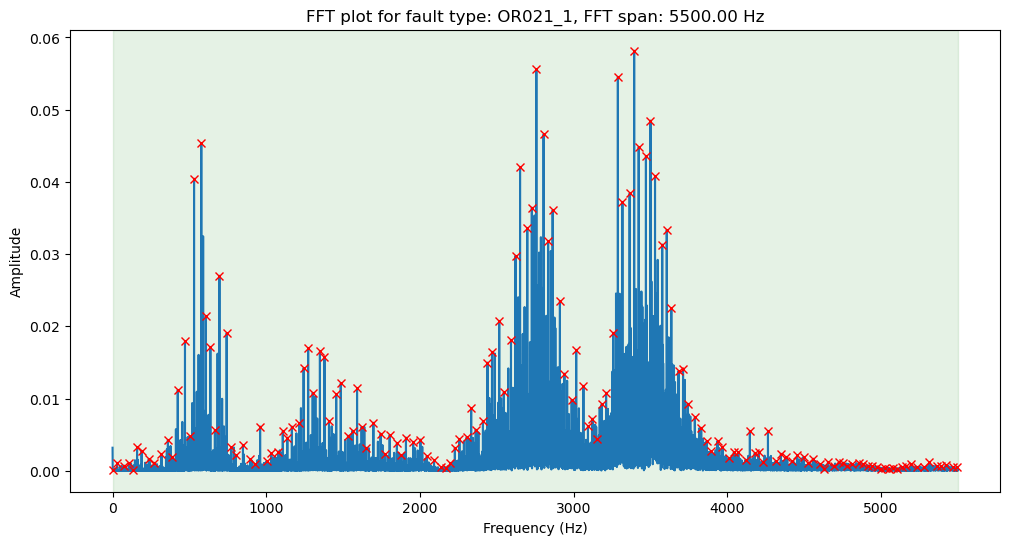

In [65]:
#by using FFT Span
from scipy.signal import find_peaks

# group the data by "fault" column
groups = df.groupby("fault")

# iterate over each group
for fault, group_df in groups:
    # extract the "DE_data" column
    signal = group_df["DE_data"].values

    # apply Hanning window to the signal
    window_size = 48000  #no of samples
    window = np.hanning(window_size)
    windowed_signal = window * signal[:window_size]


    # compute FFT
    X = np.fft.fft(windowed_signal)


 # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    # define the frequency range of interest
    fmin = 0 # Hz
    fmax = 5500 # Hz
    
    # find the indices of the frequency range of interest
    idx_min = np.argmin(np.abs(freq - fmin))
    idx_max = np.argmin(np.abs(freq - fmax))

    # get the span of the FFT
    fft_span = freq[idx_max] - freq[idx_min]

    # get the one-sided spectrum
    X_onesided = 2/N * np.abs(X[:N//2])

    # find the indices of the peaks within the frequency range of interest
    idx_peaks, _ = find_peaks(X_onesided[idx_min:idx_max], distance=100)

    # get the frequencies and amplitudes of the peaks within the frequency range of interest
    freq_peaks = freq[idx_min:idx_max][idx_peaks]
    amp_peaks = X_onesided[idx_min:idx_max][idx_peaks]

    # plot the FFT span and peaks
    plt.figure(figsize=(12,6))
    plt.plot(freq[idx_min:idx_max], X_onesided[idx_min:idx_max])
    plt.plot(freq_peaks, amp_peaks, 'x', color='r')
    plt.axvspan(freq[idx_min], freq[idx_max], alpha=0.1, color='g')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'FFT plot for fault type: {fault}, FFT span: {fft_span:.2f} Hz')
    plt.show()



PRE-PROCESS THE DATA BEFORE FEED IT TO THE MACHINE LEARNING

In [38]:
from sklearn.preprocessing import LabelEncoder #use to encode target labels
from tensorflow.keras.utils import to_categorical  #used for one-hot encoding of label

win_len=500  #setting up the kernel size
stride=300  #the kernel will move 300 pixels away in every move
    
X=[]  #used to store the data
Y=[]


for k in df['fault'].unique():  #looping through each element in "fault" row in df
    
    
    df_temp_2 = df[df['fault']==k]  #temporary df is created with only rows
    #the line above create a new df that contains only the rows of the original dataframe
    #where the fault value equal to current k value
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):  #create an evenly spaced values start from 0 and end with len(df_temp_2-win_len)
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))  # reshapes the numpy array temp to have a shape of (1, -1), where -1 is 
                                    #inferred to be the number of features in the data
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    #this code above is used to create a sliding window(kernel) with the specified window length and stride
    
X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 channel format


Y=np.array(Y)  #This line converts the list Y, which contains the labels for the sliding windows, into a numpy array.

encoder= LabelEncoder()  #his line creates an instance of the LabelEncoder class, which is used to encode categorical data as integers

encoder.fit(Y)  #This line fits the LabelEncoder instance to the numpy array Y, which maps each unique label in Y to a unique integer value

encoded_Y = encoder.transform(Y)  #This line applies the fitted LabelEncoder to the numpy array Y, which transforms each label into its 
                                  #corresponding integer value. The resulting array encoded_Y contains the encoded labels.
    
OHE_Y = to_categorical(encoded_Y)  #onverts the integer-encoded labels (in encoded_Y) to one-hot encoded vectors using the to_categorical
                                   #function in Keras. One-hot encoding is a process of converting categorical data into a numerical format that 
                                   #can be fed to machine learning models. In one-hot encoding, each category is represented as a binary vector with a 
                                   #length equal to the number of unique categories, where all elements are 0, except for the position corresponding to the category, 
                                   #which is 1. The resulting one-hot encoded label vectors are stored in the OHE_Y array.

#In summary, these lines of code encode the categorical labels in Y as integers using LabelEncoder, then convert the integers 
#into one-hot encoded vectors using to_categorical. The resulting one-hot encoded label vectors are stored in the array 
#OHE_Y and can be used for supervised learning tasks

In [39]:
X.shape

(3646, 500, 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [41]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import concatenate

# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')
import tensorflow
tensorflow.config.run_functions_eagerly(True)

no_classes = len(df['fault'].unique())
#head 1
inputs1 = Input(shape=(X.shape[1],X.shape[2]))  #creates an input layer for the neural network model. 
conv1 = Conv1D(filters=64, kernel_size=200, activation='relu')(inputs1)  #1D convolutional layer with 64 filters and a kernel size of 200. The activation function used is ReLU
drop1 = Dropout(0.5)(conv1)  #This line creates a dropout layer with a rate of 0.5 and applies it to the conv1 layer created in the previous line
                              #dropout prevent overfitting
pool1 = MaxPooling1D(pool_size=20)(drop1) #This line creates a 1D max pooling layer with a pool size of 20 and applies it to the drop1
flat1 = Flatten()(pool1)  
# head 2
inputs2 = Input(shape=(X.shape[1],X.shape[2]))
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2)
# head 3
inputs3 = Input(shape=(X.shape[1],X.shape[2]))
conv3 = Conv1D(filters=64, kernel_size=50, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3)
flat3 = Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(no_classes, activation='softmax')(dense1)
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

# Plot Model
cnn_model.summary()
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 301, 64)      12864       ['input_1[0][0]']                
                                                                                              

In [42]:
batch_size =100
epochs = 5
history = cnn_model.fit([X_train,X_train,X_train], Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([X_test,X_test,X_test],Y_test),shuffle=True)

Epoch 1/5


C:\ProgramData\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


26/26 [==============================] - 7s 267ms/step - loss: 1.5879 - accuracy: 0.4314 - val_loss: 1.0721 - val_accuracy: 0.7742
Epoch 2/5
26/26 [==============================] - 6s 246ms/step - loss: 0.4398 - accuracy: 0.9208 - val_loss: 0.3282 - val_accuracy: 0.9552
Epoch 3/5
26/26 [==============================] - 5s 203ms/step - loss: 0.1221 - accuracy: 0.9745 - val_loss: 0.1859 - val_accuracy: 0.9707
Epoch 4/5
26/26 [==============================] - 5s 208ms/step - loss: 0.0699 - accuracy: 0.9824 - val_loss: 0.1419 - val_accuracy: 0.9625
Epoch 5/5
26/26 [==============================] - 6s 222ms/step - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.1042 - val_accuracy: 0.9845


 8/35 [=====>........................] - ETA: 0s

C:\ProgramData\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


35/35 [==============================] - 1s 16ms/step


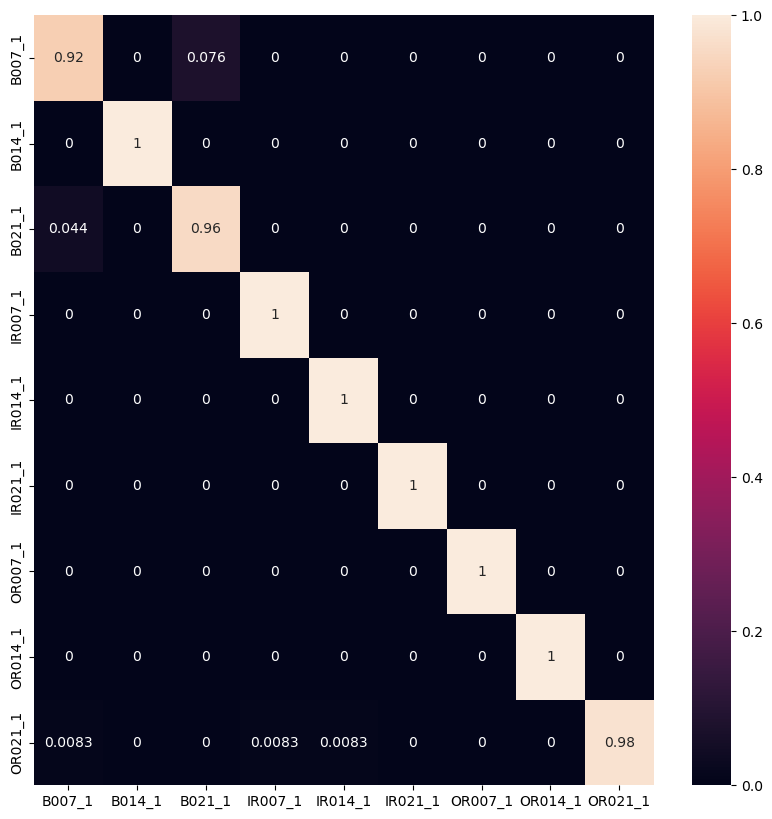

In [57]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

y_pred=cnn_model.predict([X_test,X_test,X_test])

Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(Y_test)

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [58]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
y_viz = dummy_cnn.predict([X_train,X_train,X_train])

 5/80 [>.............................] - ETA: 1s

C:\ProgramData\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


80/80 [==============================] - 1s 17ms/step


In [59]:
y_viz.shape

(2552, 100)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2552 samples in 0.001s...
[t-SNE] Computed neighbors for 2552 samples in 0.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2552
[t-SNE] Computed conditional probabilities for sample 2000 / 2552
[t-SNE] Computed conditional probabilities for sample 2552 / 2552
[t-SNE] Mean sigma: 1.387638
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.056999
[t-SNE] KL divergence after 300 iterations: 1.326315


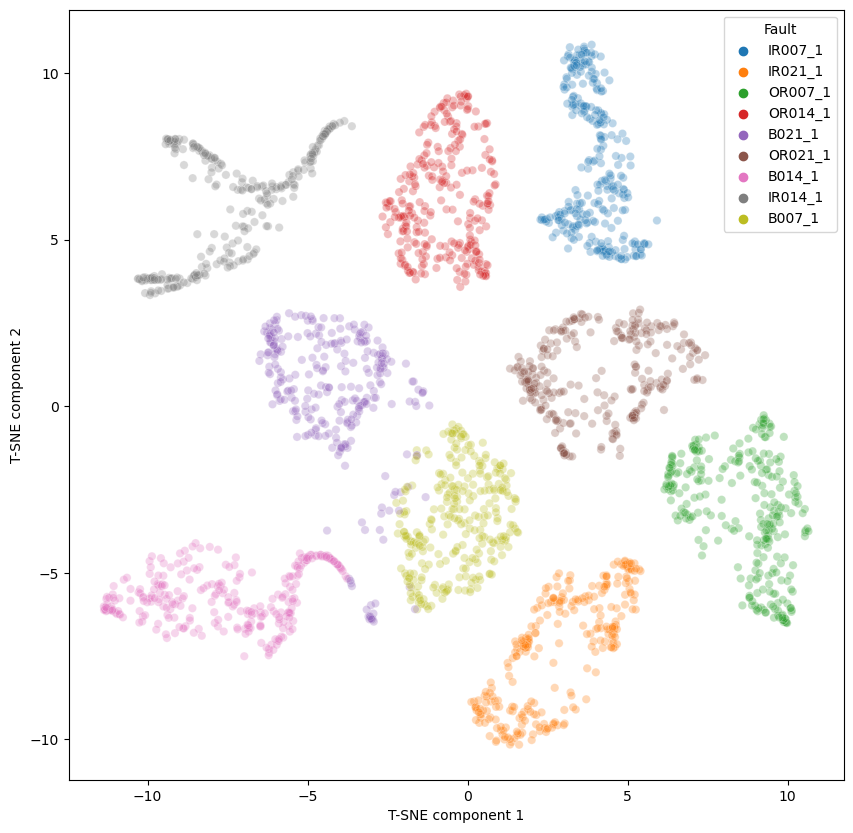

In [60]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(Y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()